## 3D Synthetic Logs Suite Maker 

### Ahmed Merzoug, Graduate Student 
##### [LinkedIn](https://www.linkedin.com/in/ahmed-merzoug/)

### Supervised by Michael Pyrcz, Professor

#### University of Texas at Austin, Austin, TX 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

This workflow has been developed to build suite of synthetic vertical wells. 

* synthetic datasets are commonly needed for method and workflow testing

* this workflow is provided to support students, researchers 

#### Methodology

This workflow:
* The data initial distribution are predefined with porosity being the primary variable for this workflow
    * Permeability distribution is modeled on a log scale using affine transformation
    * Resistivity distribution is modeled on a log scale using Archie law for water fully saturated rock 
    * Clay volume is an intermediate variable used to infer GR from Porosity and Shear Slowness from Compressional slowness. It is calculated using affine transformation. 
    * Density is calculated using the density log correlation for sandstone 
    * Compressional slowness is calcualted using the sonic log correlation for sandstone
    * Shear slowness is calculated using Castagnia et al. (1985) correlation 
    




* uses GSLIB 3D simulation to build an exhaustive 3D model (regular grid) for porosity. 

* uses GSLIB 3D Co Simulation to build derived 3D models for all other properties assuming a certain pre-defined correlation and a secondary variable. 

* extracts columns of simulated values as the set of synthetic vertical well dataset
* an example log is plotted to show results 

#### Getting Started

You will need Anaconda $\ge$ 3 installed to have access to:

* Jupyter

* Python $\ge$ 3

* Standard scientific computing packages such as numpy, pandas and scipy.

* GSLIB sgsim.exe file should be in this folder,

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy.
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality.


#### Load the required libraries

The following code loads the required libraries from GeostatsPy:

In [8]:
import geostatspy.GSLIB as GSLIB                          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats                    # GSLIB methods convert to Python 

import os                                                 # operating system, set current working directory 
import matplotlib.pyplot as plt                           # plotting
import numpy as np                                        # arrays and matrix math
from mpl_toolkits.mplot3d import Axes3D                   # 3D scatter plots
import pandas as pd                                       # DataFrames
import random
from scipy.stats import pearsonr


# New Wrapper

In [9]:
def sgsim_3D_(nreal, df, xcol, ycol, zcol, vcol, nx, ny, nz, hsiz, vsiz, seed, var, output_file):
    """Sequential Gaussian simulation, 2D wrapper for sgsim from GSLIB (.exe
    must be available in PATH or working directory).

    :param nreal: TODO
    :param df: dataframe
    :param xcol: TODO
    :param ycol: TODO
    :param vcol: TODO
    :param nx: TODO
    :param ny: TODO
    :param hsiz: TODO
    :param seed: TODO
    :param var: TODO
    :param output_file: output file
    :return: TODO
    """
    x = df[xcol]
    y = df[ycol]
    z = df[zcol]
    v = df[vcol]
    var_min = v.values.min()
    var_max = v.values.max()
    df_temp = pd.DataFrame({"X": x, "Y": y, "Z": z, "Var": v})
    Dataframe2GSLIB("data_temp.dat", df_temp)

    nug = var["nug"]
    nst = var["nst"]
    it1 = var["it1"]
    cc1 = var["cc1"]
    azi1 = var["azi1"]
    dip1 = var["dip1"] 
    hmax1 = var["hmax1"]
    hmed1 = var["hmed1"]
    hmin1 = var["hmin1"]
    it2 = var["it2"]
    cc2 = var["cc2"]
    azi2 = var["azi2"]
    dip2 = var["dip2"] 
    hmax2 = var["hmax2"]
    hmed2 = var["hmed2"]
    hmin2 = var["hmin2"]
    max_range = max(hmax1, hmax2)
    max_range_v = max(hmin1, hmin2) 
    hmn = hsiz * 0.5
    zmn = vsiz * 0.5
    hctab = int(max_range / hsiz) * 2 + 1
    hctab2 = int(max_range_v / vsiz) * 2 + 1

    with open("sgsim.par", "w") as f:
        f.write("              Parameters for SGSIM                                         \n")
        f.write("              ********************                                         \n")
        f.write("                                                                           \n")
        f.write("START OF PARAMETER:                                                        \n")
        f.write("data_temp.dat                 -file with data                              \n")
        f.write("1  2  3  4  0  0              -  columns for X,Y,Z,vr,wt,sec.var.          \n")
        f.write("-1.0e21 1.0e21                -  trimming limits                           \n")
        f.write("1                             -transform the data (0=no, 1=yes)            \n")
        f.write("none.trn                      -  file for output trans table               \n")
        f.write("0                             -  consider ref. dist (0=no, 1=yes)          \n")
        f.write("none.dat                      -  file with ref. dist distribution          \n")
        f.write("1  0                          -  columns for vr and wt                     \n")
        f.write(str(var_min) + " " + str(var_max) + "   zmin,zmax(tail extrapolation)       \n")
        f.write("1   " + str(var_min) + "      -  lower tail option, parameter              \n")
        f.write("1   " + str(var_max) + "      -  upper tail option, parameter              \n")
        f.write("0                             -debugging level: 0,1,2,3                    \n")
        f.write("nonw.dbg                      -file for debugging output                   \n")
        f.write(str(output_file) + "           -file for simulation output                  \n")
        f.write(str(nreal) + "                 -number of realizations to generate          \n")
        f.write(str(nx) + " " + str(hmn) + " " + str(hsiz) + "                              \n")
        f.write(str(ny) + " " + str(hmn) + " " + str(hsiz) + "                              \n")
        f.write(str(nz) + " " + str(zmn) + " " + str(vsiz) + "                              \n")
        f.write(str(seed) + "                  -random number seed                          \n")
        f.write("0     8                       -min and max original data for sim           \n")
        f.write("12                            -number of simulated nodes to use            \n")
        f.write("1                             -assign data to nodes (0=no, 1=yes)          \n")
        f.write("1     3                       -multiple grid search (0=no, 1=yes),num      \n")
        f.write("0                             -maximum data per octant (0=not used)        \n")
        f.write(str(max_range) + " " + str(max_range) +" "+ str(max_range_v) + " -maximum search  (hmax,hmin,vert) \n")
        f.write(str(azi1) + "   0.0   0.0       -angles for search ellipsoid                 \n")
        f.write(str(hctab) + " " + str(hctab) + " " + str(hctab2) +" -size of covariance lookup table        \n")
        f.write("1     0.60   1.0              - ktype: 0=SK,1=OK,2=LVM,3=EXDR,4=COLC        \n")
        f.write("none.dat                      -  file with LVM, EXDR, or COLC variable     \n")
        f.write("4                             -  column for secondary variable             \n")
        f.write(str(nst) + " " + str(nug) + "  -nst, nugget effect                          \n")
        f.write(str(it1) + " " + str(cc1) + " " + str(azi1) + "  " + str(dip1) +" 0.0 -it,cc,ang1,ang2,ang3\n")
        f.write(" " + str(hmax1) + " 	" + str(hmed1) +  "		" + str(hmin1) + "  - a_hmax, a_hmin, a_vert        \n")
        f.write(str(it2) + " " + str(cc2) + " 	" + str(azi2) + "		" + str(dip2) +" 0.0 -it,cc,ang1,ang2,ang3\n")
        f.write(" " + str(hmax2) + " " + str(hmed2) +  " " +str(hmin2) + " - a_hmax, a_hmin, a_vert        \n")

    os.system("sgsim.exe sgsim.par")
    sim_array = GSLIB2ndarray_3D(output_file, 0, nreal, nx, ny, nz)
    return sim_array[0]
def sgsim_3D(nreal, df, xcol, ycol, zcol, vcol, nx, ny, nz, hsiz, vsiz, seed, var,sec, correl, output_file):
    """Sequential Gaussian simulation, 2D wrapper for sgsim from GSLIB (.exe
    must be available in PATH or working directory).

    :param nreal: TODO
    :param df: dataframe
    :param xcol: TODO
    :param ycol: TODO
    :param vcol: TODO
    :param nx: TODO
    :param ny: TODO
    :param hsiz: TODO
    :param seed: TODO
    :param var: TODO
    :param output_file: output file
    :return: TODO
    """
    x = df[xcol]
    y = df[ycol]
    z = df[zcol]
    v = df[vcol]
    var_min = v.values.min()
    var_max = v.values.max()
    df_temp = pd.DataFrame({"X": x, "Y": y, "Z": z, "Var": v})
    Dataframe2GSLIB("data_temp.dat", df_temp)
    ndarray2GSLIB_3D(sec, "sec.dat", "sec_dat")

    nug = var["nug"]
    nst = var["nst"]
    it1 = var["it1"]
    cc1 = var["cc1"]
    azi1 = var["azi1"]
    dip1 = var["dip1"] 
    hmax1 = var["hmax1"]
    hmed1 = var["hmed1"]
    hmin1 = var["hmin1"]
    it2 = var["it2"]
    cc2 = var["cc2"]
    azi2 = var["azi2"]
    dip2 = var["dip2"] 
    hmax2 = var["hmax2"]
    hmed2 = var["hmed2"]
    hmin2 = var["hmin2"]
    max_range = max(hmax1, hmax2)
    max_range_v = max(hmin1, hmin2) 
    hmn = hsiz * 0.5
    zmn = vsiz * 0.5
    hctab = int(max_range / hsiz) * 2 + 1
    hctab2 = int(max_range_v / vsiz) * 2 + 1

    with open("sgsim.par", "w") as f:
        f.write("              Parameters for SGSIM                                         \n")
        f.write("              ********************                                         \n")
        f.write("                                                                           \n")
        f.write("START OF PARAMETER:                                                        \n")
        f.write("data_temp.dat                 -file with data                              \n")
        f.write("1  2  3  4  0  0              -  columns for X,Y,Z,vr,wt,sec.var.          \n")
        f.write("-1.0e21 1.0e21                -  trimming limits                           \n")
        f.write("1                             -transform the data (0=no, 1=yes)            \n")
        f.write("none.trn                      -  file for output trans table               \n")
        f.write("0                             -  consider ref. dist (0=no, 1=yes)          \n")
        f.write("none.dat                      -  file with ref. dist distribution          \n")
        f.write("1  0                          -  columns for vr and wt                     \n")
        f.write(str(var_min) + " " + str(var_max) + "   zmin,zmax(tail extrapolation)       \n")
        f.write("1   " + str(var_min) + "      -  lower tail option, parameter              \n")
        f.write("1   " + str(var_max) + "      -  upper tail option, parameter              \n")
        f.write("0                             -debugging level: 0,1,2,3                    \n")
        f.write("nonw.dbg                      -file for debugging output                   \n")
        f.write(str(output_file) + "           -file for simulation output                  \n")
        f.write(str(nreal) + "                 -number of realizations to generate          \n")
        f.write(str(nx) + " " + str(hmn) + " " + str(hsiz) + "                              \n")
        f.write(str(ny) + " " + str(hmn) + " " + str(hsiz) + "                              \n")
        f.write(str(nz) + " " + str(zmn) + " " + str(vsiz) + "                              \n")
        f.write(str(seed) + "                  -random number seed                          \n")
        f.write("0     8                       -min and max original data for sim           \n")
        f.write("12                            -number of simulated nodes to use            \n")
        f.write("1                             -assign data to nodes (0=no, 1=yes)          \n")
        f.write("1     3                       -multiple grid search (0=no, 1=yes),num      \n")
        f.write("0                             -maximum data per octant (0=not used)        \n")
        f.write(str(max_range) + " " + str(max_range) +" "+ str(max_range_v) + " -maximum search  (hmax,hmin,vert) \n")
        f.write(str(azi1) + "   0.0   0.0       -angles for search ellipsoid                 \n")
        f.write(str(hctab) + " " + str(hctab) +  " " + str(hctab2) + " -size of covariance lookup table        \n")
        f.write("4 "    + str(correl) +   " 1.0              - ktype: 0=SK,1=OK,2=LVM,3=EXDR,4=COLC        \n")
        f.write("sec.dat                      -  file with LVM, EXDR, or COLC variable     \n")
        f.write("1                             -  column for secondary variable             \n")
        f.write(str(nst) + " " + str(nug) + "  -nst, nugget effect                          \n")
        f.write(str(it1) + " " + str(cc1) + " " + str(azi1) + "  " + str(dip1) +" 0.0 -it,cc,ang1,ang2,ang3\n")
        f.write(" " + str(hmax1) + " 	" + str(hmed1) +  "		" + str(hmin1) + "  - a_hmax, a_hmin, a_vert        \n")
        f.write(str(it2) + " " + str(cc2) + " 	" + str(azi2) + "		" + str(dip2) +" 0.0 -it,cc,ang1,ang2,ang3\n")
        f.write(" " + str(hmax2) + " " + str(hmed2) +  " " +str(hmin2) + " - a_hmax, a_hmin, a_vert        \n")

    os.system("sgsim.exe sgsim.par")
    sim_array = GSLIB2ndarray_3D(output_file, 0, nreal, nx, ny, nz)
    return sim_array[0]


### Additional Required Function 

(ndarray2GSLIB_3D) is a new function

In [10]:
def Dataframe2GSLIB(data_file, df):
    """Convert pandas DataFrame to a GSLIB Geo-EAS file for use with GSLIB
    methods.

    :param data_file: file name
    :param df: dataframe
    :return: None
    """
    ncol = len(df.columns)
    nrow = len(df.index)

    with open(data_file, "w") as f:
        f.write(data_file + "\n")
        f.write(str(ncol) + "\n")

        for icol in range(ncol):
            f.write(df.columns[icol] + "\n")
        for irow in range(nrow):
            for icol in range(ncol):
                f.write(str(df.iloc[irow, icol]) + " ")
            f.write("\n")
def GSLIB2ndarray_3D(data_file, kcol,nreal, nx, ny, nz):
    """Convert GSLIB Geo-EAS file to a 1D or 2D numpy ndarray for use with
    Python methods

    :param data_file: file name
    :param kcol: name of column which contains property
    :param nreal: Number of realizations
    :param nx: shape along x dimension
    :param ny: shape along y dimension
    :param nz: shape along z dimension
    :return: ndarray, column name
    """
    if nz > 1 and ny > 1:
        array = np.ndarray(shape = (nreal, ny, nx, nz), dtype=float, order="F")
    elif ny > 1:
        array = np.ndarray(shape=(nreal, ny, nx), dtype=float, order="F")
    else:
        array = np.zeros(nreal, nx)

    with open(data_file) as f:
        head = [next(f) for _ in range(2)]  # read first two lines
        line2 = head[1].split()
        ncol = int(line2[0])  # get the number of columns

        for icol in range(ncol):  # read over the column names
            head = next(f)
            if icol == kcol:
                col_name = head.split()[0]
        for ineal in range(nreal):		
            if nz > 1 and ny > 1:
                for iz in range(nz):
                    for iy in range(ny):
                        for ix in range(nx):
                            head = next(f)
                            array[ineal][ny - 1 - iy][ix][iz] = head.split()[kcol]    					
            elif ny > 1:
                for iy in range(ny):
                    for ix in range(0, nx):
                        head = next(f)
                        array[ineal][ny - 1 - iy][ix] = head.split()[kcol]
            else:
                for ix in range(nx):
                    head = next(f)
                    array[ineal][ix] = head.split()[kcol]
    return array, col_name

def GSLIB2ndarray_3D(data_file, kcol,nreal, nx, ny, nz):
    """Convert GSLIB Geo-EAS file to a 1D or 2D numpy ndarray for use with
    Python methods

    :param data_file: file name
    :param kcol: name of column which contains property
    :param nreal: Number of realizations
    :param nx: shape along x dimension
    :param ny: shape along y dimension
    :param nz: shape along z dimension
    :return: ndarray, column namea
    """
    if nz > 1 and ny > 1:
        array = np.ndarray(shape = (nreal, ny, nx, nz), dtype=float, order="F")
    elif ny > 1:
        array = np.ndarray(shape=(nreal, ny, nx), dtype=float, order="F")
    else:
        array = np.zeros(nreal, nx)

    with open(data_file) as f:
        head = [next(f) for _ in range(2)]  # read first two lines
        line2 = head[1].split()
        ncol = int(line2[0])  # get the number of columns

        for icol in range(ncol):  # read over the column names
            head = next(f)
            if icol == kcol:
                col_name = head.split()[0]
        for ineal in range(nreal):		
            if nz > 1 and ny > 1:
                for iz in range(nz):
                    for iy in range(ny):
                        for ix in range(nx):
                            head = next(f)
                            array[ineal][ny - 1 - iy][ix][iz] = head.split()[kcol]    					
            elif ny > 1:
                for iy in range(ny):
                    for ix in range(0, nx):
                        head = next(f)
                        array[ineal][ny - 1 - iy][ix] = head.split()[kcol]
            else:
                for ix in range(nx):
                    head = next(f)
                    array[ineal][ix] = head.split()[kcol]
    return array, col_name

import numpy as np

def ndarray2GSLIB_3D(array, data_file, col_name="Property"):
    """Convert a 3D numpy ndarray to a GSLIB Geo-EAS file.

    :param array: input 3D ndarray
    :param data_file: file name for the GSLIB file
    :param col_name: column name for the property
    :return: None
    """
    
    dims = len(array.shape)

    with open(data_file, "w") as f:
        # Write header
        f.write(data_file + "\n")
        f.write("1 \n")
        f.write(col_name + "\n")

        # If 3D array with realizations
        if dims == 4:
            nreal, ny, nx, nz = array.shape
            for ireal in range(nreal):
                for iz in range(nz):
                    for iy in range(ny):
                        for ix in range(nx):
                            f.write(str(array[ireal, ny - 1 - iy, ix, iz]) + "\n")

        # If 3D array without realizations
        elif dims == 3:
            ny, nx, nz = array.shape
            for iz in range(nz):
                for iy in range(ny):
                    for ix in range(nx):
                        f.write(str(array[ny - 1 - iy, ix, iz]) + "\n")

        else:
            raise ValueError("Array dimensions not supported. Provide a 3D or 4D ndarray.")





# Generate Data Distribution

In [11]:

number_data_points = 2000
mean_por =0.1; std_por = 0.02
mean_lnPerm = 4.7; std_lnPerm = 0.3
Por = np.random.normal(mean_por, std_por, number_data_points) #Initial Gaussian Data for Porosity
lnPerm = std_lnPerm/std_por*(Por-mean_por)+mean_lnPerm +np.random.normal(0, 0.05, number_data_points)  #Affine transformation (assuming high correlation) + Noise 
#Archie law for Resistivity assuming water fully saturated rock, rw is the water resistivity, a, and m and archie exponents
rw = 0.044; a =1; m=2
lnR = np.log(rw*a/Por**m)
#Using Sonic log Porosity Equation Note that these results are parameters dependent. 
ts = 55 #(us) assuming SandStone
tf = 189 #(us) assuming water
CompressionalSlowness = Por*(tf-ts)+ts+np.random.normal(0, 0.5, number_data_points)

#Using density log Equation for sandstone 
rho_s = 2.65 #(g/cc)
rho_f = 1 #g/cc assuming water
rho_bulk = (rho_s - rho_f)*Por + rho_s +np.random.normal(0, 0.01, number_data_points)

#use Clay as an intermediate variable for ts and GR
clay_v_mean = 0.08; clay_v_std = 0.01
clay_v = -clay_v_std/std_por*(Por-mean_por)+clay_v_mean +np.random.normal(0, 0.01, number_data_points)


#GR log use the GR Index as clay volume 
GR_min = 30; GR_max = 95
GR = clay_v *(GR_max-GR_min)+GR_min +np.random.normal(0, 1, number_data_points)

#TS log (shear Slowness) is calculated using Castagna et al 1985 Correlation for SandStone 
ShearSlowness = (1.08 + 1.61/(3.89-2.04*clay_v))*CompressionalSlowness


df = pd.DataFrame({
    'ShearSlowness': ShearSlowness,
    'GR': GR,
    'Por': Por,
    'LnPerm': lnPerm,
    'lnR': lnR,
    'CompressionalSlowness': CompressionalSlowness,
    'Density': rho_bulk
})

df['X']=-999
df['Y']=-999
df['Z']=-999

#### The Simulation Grid

Let's set up the regular simulation grid.

* should cover the extent of the vertical wells

* wells will have the vertical resolution and extend from this grid.  The wells are columns from this model.

This grid sepcification is the GEO-DAS format.

* the grid is assumed to be orientated with the x-y-z coordinate system (no rotation)
* $nx$, $ny$ and $nz$ are the number of cells over each coordinate
* $x_{siz}$, $y_{siz}$ and $z_{siz}$ are the sizes of the cells over each coordinate
* xmn, ymn and zmn are the respective coordinates of the lower, left, cell centroid. e.g. $x_{mn} = x_{min} + x_{size} \times 0.5$ 

In [12]:
nx = 100; ny = 100; nz = 100
hsiz = 10.0; vsiz = 1.0; seed = 73073
xmin = 0.0; ymin = 0.0; zmin = 0.0
xmax = xmin + nx * hsiz; ymax = ymin + ny * hsiz; zmax = zmin + nz * vsiz
xmn = xmin + hsiz*0.5; ymn = ymin + hsiz*0.5; zmn = zmin + vsiz*0.5

#### Spatial Continuity Model

Next we specify the variogram model to impose spatial continuity.

* see standard geostatistics textbooks (Deutsch and Journel, 1998 or Pyrcz and Deutsch, 2014) for description of variogram parameterization

In [13]:
nst = 1; azi = 0.0; nug = 0.0; sill = 1                        # specify 3D variogram model parameters
hmax = 1000.0; hmin = 1000.0; hvert = 20                    # we are assuming 1 structure, another could be added
#hmax = 0.01; hmin = 0.01; hvert = 0.01   # end case testing, test local distributions match global distribution
xsiz=5;cmap = plt.cm.inferno

# Make variogram object for GeostatsPy
vario = geostats.make_variogram_3D(nug = 0.0,nst = nst,it1 = 1,cc1 = sill - nug,azi1 = azi,dip1 = 0.0,
    hmax1 = hmax,hmed1 = hmin,hmin1 = hvert)

#### Simulation

Run the sequential Gaussian simulation to build a realization over the specified grid

* honors the target distribution 
* honors the vairogram model

The wrapper:

* creates a sgsim.par file in the working directory
* runs the sgsim executable with the parameter file
* reads the results back in as an numpy ndarray

#### Simulation Porosity

In [16]:
sim = sgsim_3D_(nreal=1, df=df, xcol='X', ycol='Y', zcol='Z', vcol='Por', nx=nx, ny=ny, nz=nz, 
                     hsiz=hsiz, vsiz=vsiz, seed=seed, var=vario, output_file="sgsim3d.out")
print('The ndarray is indexed ireal, iy, ix, iz with size ' + str(sim.shape) + '.')

FileNotFoundError: [Errno 2] No such file or directory: 'sgsim3d.out'

#### Co-simulating Propoerties

In [332]:
sim_perm = sgsim_3D(nreal=1, df=df, xcol='X', ycol='Y', zcol='Z', vcol='LnPerm', nx=nx, ny=ny, nz=nz, 
                     hsiz=hsiz, vsiz=vsiz, seed=200, var=vario, sec = sim[0], correl = 0.8, output_file="sgsim3d2.out")

sim_lnR= sgsim_3D(nreal=1, df=df, xcol='X', ycol='Y', zcol='Z', vcol='lnR', nx=nx, ny=ny, nz=nz, 
                     hsiz=hsiz, vsiz=vsiz, seed=200, var=vario, sec = sim[0], correl = -0.5, output_file="sgsim3d2.out")


sim_Den= sgsim_3D(nreal=1, df=df, xcol='X', ycol='Y', zcol='Z', vcol='Density', nx=nx, ny=ny, nz=nz, 
                     hsiz=hsiz, vsiz=vsiz, seed=200, var=vario, sec = sim[0], correl = -0.9, output_file="sgsim3d2.out")

sim_t_p= sgsim_3D(nreal=1, df=df, xcol='X', ycol='Y', zcol='Z', vcol='CompressionalSlowness', nx=nx, ny=ny, nz=nz, 
                     hsiz=hsiz, vsiz=vsiz, seed=200, var=vario, sec = sim[0], correl = 0.9, output_file="sgsim3d2.out")

sim_t_s= sgsim_3D(nreal=1, df=df, xcol='X', ycol='Y', zcol='Z', vcol='ShearSlowness', nx=nx, ny=ny, nz=nz, 
                     hsiz=hsiz, vsiz=vsiz, seed=200, var=vario, sec = sim_t_p[0], correl = 0.9, output_file="sgsim3d2.out")
sim_GR= sgsim_3D(nreal=1, df=df, xcol='X', ycol='Y', zcol='Z', vcol='GR', nx=nx, ny=ny, nz=nz, 
                     hsiz=hsiz, vsiz=vsiz, seed=200, var=vario, sec = sim_perm[0], correl = -0.6, output_file="sgsim3d2.out")


# Selecting Wells Locations

In [338]:
wellx = [150, 250, 820, 530, 140, 840, 400] 
welly = [560, 130, 90, 55, 420, 630, 200]

nwell = len(wellx)

xloc = np.zeros(nwell*nz); yloc = np.zeros(nwell*nz); zloc = np.zeros(nwell*nz);
wloc = np.zeros(nwell*nz); vloc = np.zeros(nwell*nz)
vloc2 = np.zeros(nwell*nz);vloc3 = np.zeros(nwell*nz);vloc4 = np.zeros(nwell*nz);vloc5 = np.zeros(nwell*nz);vloc6 = np.zeros(nwell*nz)

vloc7 = np.zeros(nwell*nz)

index = 0

for iwell in range(0,len(wellx)):
    wx = wellx[iwell]; wy = welly[iwell]
    ix = geostats.getindex(nx,xmn,hsiz,wx)
    iy = geostats.getindex(ny,ymn,hsiz,wy)
    for iz in range(0,nz):
        wz = vsiz*iz
        iz = geostats.getindex(nz,zmn,vsiz,wz)
        xloc[index] = wx; yloc[index] = wy; zloc[index] = wz
        vloc[index] = sim[0,iy,ix,iz]; wloc[index] = int(iwell)
        vloc2[index] = np.exp(sim_perm[0,iy,ix,iz])
        vloc3[index] = np.exp(sim_lnR[0,iy,ix,iz])
        vloc4[index] = sim_Den[0,iy,ix,iz]
        vloc5[index] = sim_t_p[0,iy,ix,iz]
        vloc6[index] = sim_t_s[0,iy,ix,iz]
        vloc7[index] = sim_GR[0,iy,ix,iz]
        index = index + 1

df_wells = pd.DataFrame({'Well':wloc,'X':xloc,'Y':yloc,'Z':zloc,'GR':vloc7,'Por':vloc,'Perm':vloc2, 'R':vloc3,'Density':vloc4,'Tp':vloc5,'Ts':vloc6})
df_wells['Well'] = pd.to_numeric(df_wells['Well'], downcast='integer')


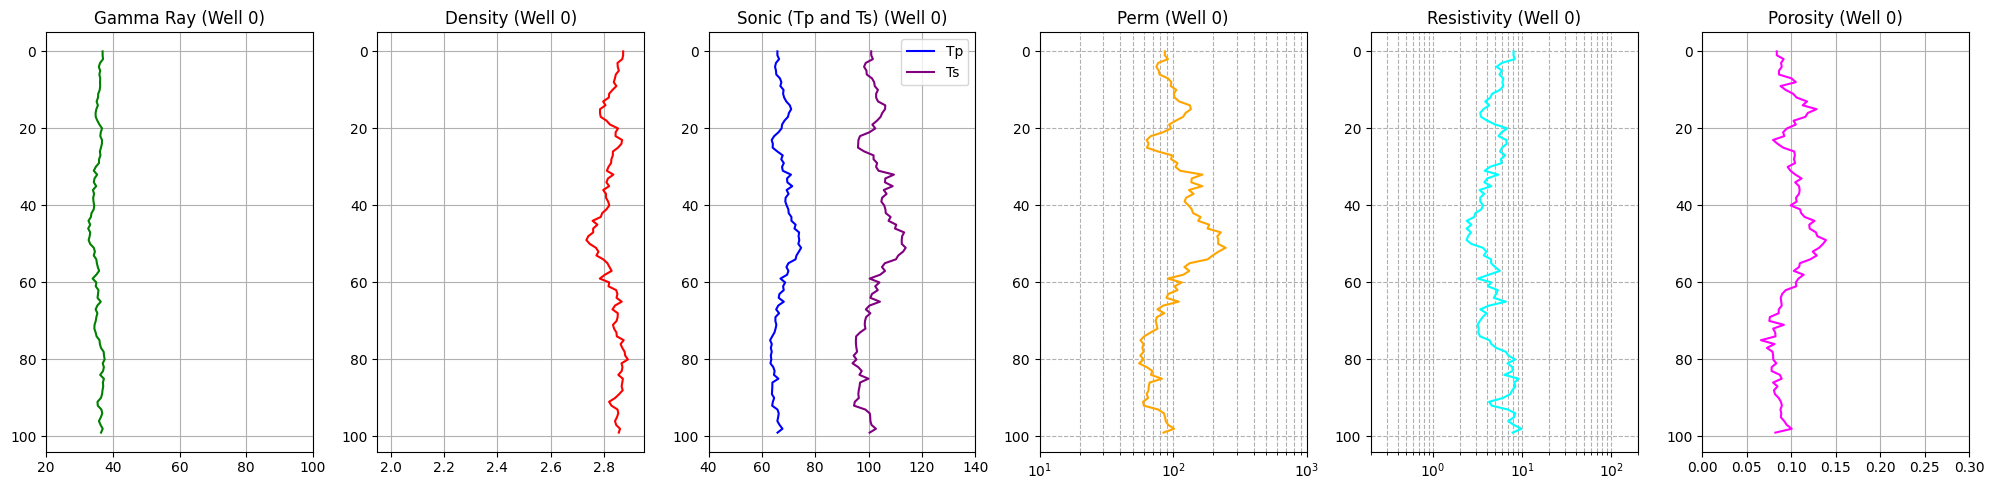

In [339]:
# Now, let's re-plot the data for the newly provided Well

df_wells.to_csv('C:/Users/17012/Downloads/Workflows/synthetic_data_new.csv')
df_wells2=pd.read_csv('C:/Users/17012/Downloads/Workflows/synthetic_data_new.csv')


new_well_0=df_wells2[df_wells['Well']==0]


# Setting up the plot with proper layout for the new Well 0 data
fig, axs = plt.subplots(1, 6, figsize=(20, 5))

# Plotting Gamma for the new Well 0 data
axs[0].plot("GR", "Z", data=new_well_0, color="green")
axs[0].set_title("Gamma Ray (Well 0)")
axs[0].set_xlim(20, 100)
axs[0].invert_yaxis()
axs[0].grid()

# Plotting Density for the new Well 0 data
axs[1].plot("Density", "Z", data=new_well_0, color="red")
axs[1].set_title("Density (Well 0)")
axs[1].set_xlim(1.95, 2.95)
axs[1].invert_yaxis()
axs[1].grid()

# Plotting Sonic (Tp and Ts) for the new Well 0 data
axs[2].plot("Tp", "Z", data=new_well_0, color="blue", label="Tp")
axs[2].plot("Ts", "Z", data=new_well_0, color="purple", label="Ts")
axs[2].set_title("Sonic (Tp and Ts) (Well 0)")
axs[2].set_xlim(40, 140)
axs[2].invert_yaxis()
axs[2].legend()
axs[2].grid()

# Plotting Exponential of Perm for the new Well 0 data with logarithmic scale
axs[3].semilogx("Perm", "Z", data=new_well_0, color="orange")
axs[3].set_title("Perm (Well 0)")
axs[3].set_xlim(10, 1000)
axs[3].invert_yaxis()
axs[3].grid()
axs[3].grid(which="both", ls="--")  # Adding log gridlines to the logarithmic plot


# Plotting Exponential of Resistivity for the new Well 0 data with logarithmic scale
axs[4].semilogx("R", "Z", data=new_well_0, color="cyan")
axs[4].set_title("Resistivity (Well 0)")
axs[4].set_xlim(0.2, 200)
axs[4].invert_yaxis()
axs[4].grid()
axs[4].grid(which="both", ls="--")  # Adding log gridlines to the logarithmic plot


# Plotting Porosity for the new Well 0 data
axs[5].plot("Por", "Z", data=new_well_0, color="magenta")
axs[5].set_title("Porosity (Well 0)")
axs[5].set_xlim(0, 0.3)
axs[5].invert_yaxis()
axs[5].grid()

plt.tight_layout()
plt.show()


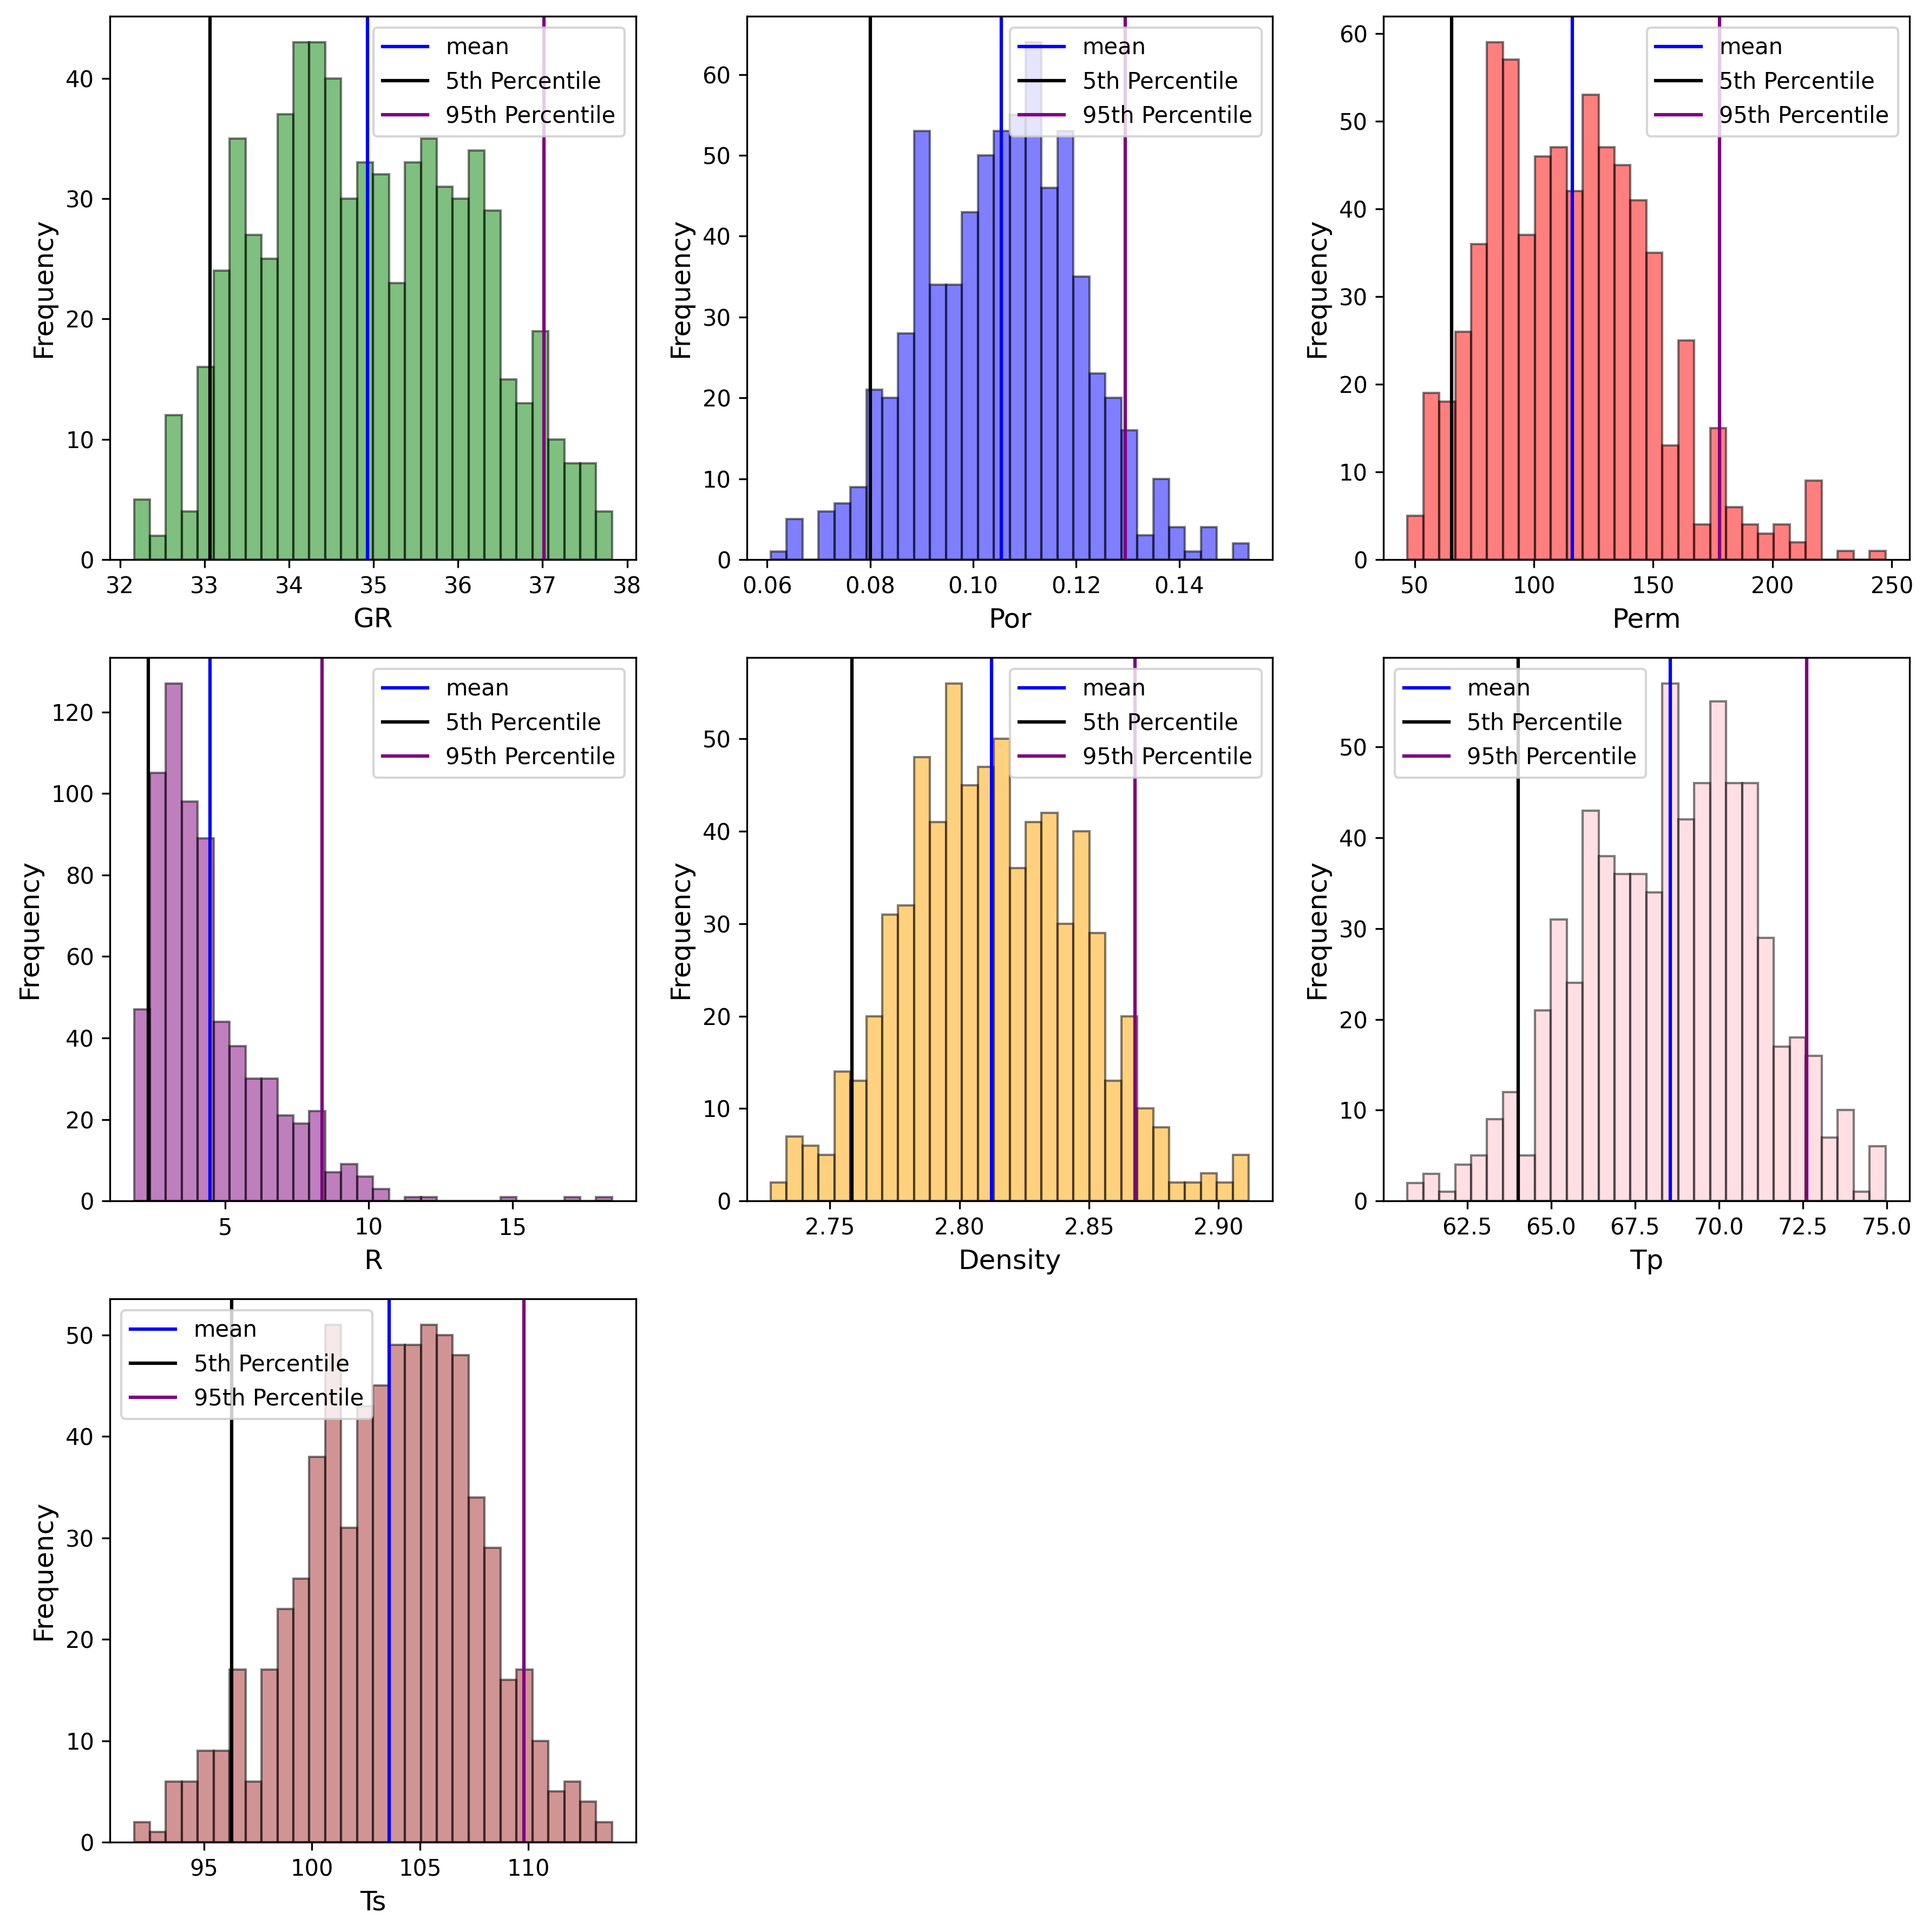

In [344]:
import matplotlib.pyplot as plt

# Define the list of variables and corresponding colors
variables = ['GR', 'Por', 'Perm', 'R','Density', 'Tp', 'Ts']
colors = ['green', 'blue', 'red', 'purple', 'orange', 'pink', 'brown']

# Create subplots in a 3x3 grid
fig, axs = plt.subplots(3, 3, figsize=(12, 12), dpi=300)

# Loop through each variable and plot its histogram in the corresponding subplot
for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    
    mean = df_wells2[var].mean()
    p5 = df_wells2[var].quantile(0.05)
    p95 = df_wells2[var].quantile(0.95)
    
    axs[row, col].hist(df_wells2[var], bins=30, color=colors[i], alpha=0.5, edgecolor='black')
    axs[row, col].axvline(mean, color='blue', label='mean')
    axs[row, col].axvline(p5, color='black', label='5th Percentile')
    axs[row, col].axvline(p95, color='purple', label='95th Percentile')
    
    axs[row, col].set_xlabel(var, fontsize=12)
    axs[row, col].set_ylabel('Frequency', fontsize=12)
    axs[row, col].legend()

# Remove empty subplots if there are fewer than 9 variables
if len(variables) < 9:
    for i in range(len(variables), 9):
        fig.delaxes(axs[i // 3, i % 3])

plt.tight_layout()
plt.show()


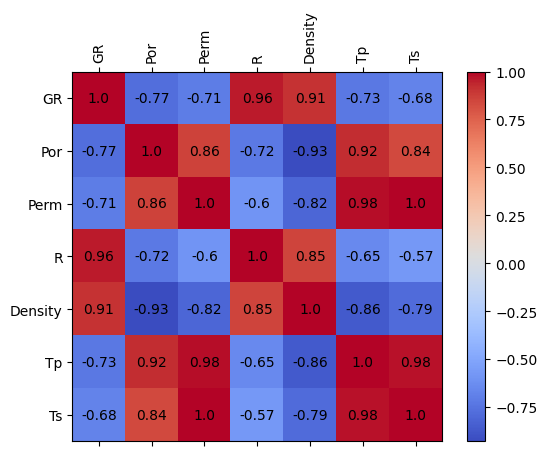

In [345]:
dataframe=df_wells.drop('Well',axis=1)
dataframe=dataframe.drop('Z',axis=1)
dataframe=dataframe.drop('X',axis=1)
dataframe=dataframe.drop('Y',axis=1)
dataframe
correlation_matrix= dataframe.corr(method='spearman')

# Create a heatmap with correlation coefficient numbers
fig, ax = plt.subplots()
cax = ax.matshow(correlation_matrix, cmap='coolwarm')

plt.colorbar(cax)  # Add colorbar

# Add correlation coefficient numbers to the heatmap
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        text = ax.text(j, i, round(correlation_matrix.iloc[i, j], 2),
                       ha='center', va='center', color='black')

# Set the x and y axis labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.show()

In [336]:
#Code borrowed from https://github.com/geomodeller/KSMER_GeostatsDemo/blob/main/GeostatsDemo_3D_visualization.ipynb

import matplotlib.cm as cm
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
def visualize_3D_full(cube, nx,ny,nz,angle=320, cmap_ = cm.afmhot):
    ### Note that cube should numpy array whose dimension is NX x NY x NZ
    cube = (cube-cube.min())/(cube.max()-cube.min())
    facecolors = cmap_(cube)
    facecolors[:,:,:,-1] = 1
    # this is to select where to colour
    fc = np.zeros((nx,ny,nz))
    fc[:,0,:] = 1
    fc[-1,:,:] = 1
    fc[:,:,-1] = 1
    facecolors[:,:,:,-1] = fc
    facecolors = explode(facecolors)

    filled = facecolors[:,:,:,-1] != 0
    x, y, z = expand_coordinates(np.indices(np.array(filled.shape) + 1))

    fig = plt.figure(figsize=(15,7))
    ax = plt.subplot(projection='3d')
    ax.view_init(30, angle)
    ax.set_xlim(right=nx*2)
    ax.set_ylim(top=ny*2)
    ax.set_zlim(top=nz*2)      
    im = ax.voxels(x, y, z, filled, facecolors=facecolors)

    ax.set_xlabel("X-axis, grid")
    ax.set_ylabel("Y-axis, grid")
    ax.set_zlabel("Z-axis, grid")
    ax.xaxis.set_pane_color([1.0,1.0,1.0,1.0])    # fig.colorbar(im, ax=ax)
    ax.yaxis.set_pane_color([1.0,1.0,1.0,1.0])    # fig.colorbar(im, ax=ax)
    ax.zaxis.set_pane_color([1.0,1.0,1.0,1.0])    # fig.colorbar(im, ax=ax)
    ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,1)
    ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,1)
    ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,1)
    
def visualize_3D_fence_diagram(cube, nx,ny,nz,angle=320, cmap_ = cm.afmhot):
    ### Note that cube should numpy array whose dimension is NX x NY x NZ
    cube = (cube-cube.min())/(cube.max()-cube.min())
    facecolors = cmap_(cube)
    
    # this is to select where to colour
    fc = np.zeros((nx,ny,nz))
    fc[:,-3,:] = 1
    fc[3,:,:] = 1
    fc[:,:,3] = 1
    facecolors[:,:,:,-1] = fc
    
    facecolors = explode(facecolors)
    filled = facecolors[:,:,:,-1] != 0
    x, y, z = expand_coordinates(np.indices(np.array(filled.shape) + 1))

    fig = plt.figure(figsize=(15,7))
    ax = plt.subplot(projection='3d')
    ax.view_init(30, angle)
    ax.set_xlim(right=nx*2)
    ax.set_ylim(top=ny*2)
    ax.set_zlim(top=nz*2)      
    im = ax.voxels(x, y, z, filled, facecolors=facecolors)

    ax.set_xlabel("X-axis, grid")
    ax.set_ylabel("Y-axis, grid")
    ax.set_zlabel("Z-axis, grid")
    ax.xaxis.set_pane_color([1.0,1.0,1.0,1.0])    # fig.colorbar(im, ax=ax)
    ax.yaxis.set_pane_color([1.0,1.0,1.0,1.0])    # fig.colorbar(im, ax=ax)
    ax.zaxis.set_pane_color([1.0,1.0,1.0,1.0])    # fig.colorbar(im, ax=ax)
    
    ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,1)
    ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,1)
    ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,1)
def explode(data):
    shape_arr = np.array(data.shape)
    size = shape_arr[:3]*2 - 1
    exploded = np.zeros(np.concatenate([size, shape_arr[3:]]), dtype=data.dtype)
    exploded[::2, ::2, ::2] = data
    return exploded

def expand_coordinates(indices):
    x, y, z = indices
    x[1::2, :, :] += 1
    y[:, 1::2, :] += 1
    z[:, :, 1::2] += 1
    return x, y, z         

## 3D Plot for porosity distribution

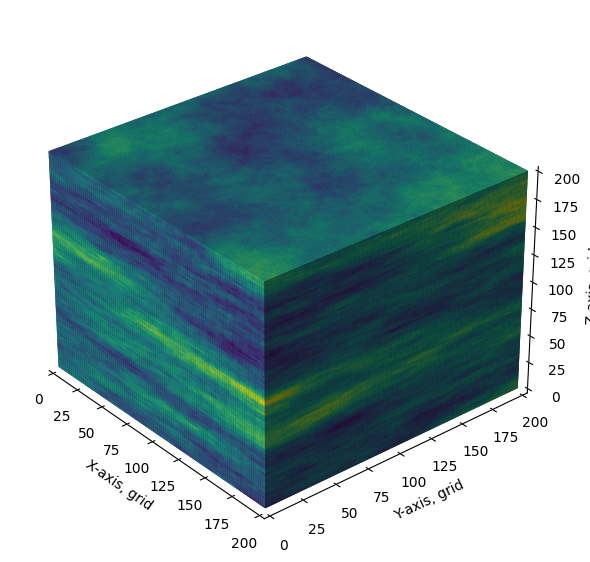

In [340]:
visualize_3D_full(sim[0],nx,ny,nz,cmap_=cm.viridis)

## 3D Plot for permeability distribution

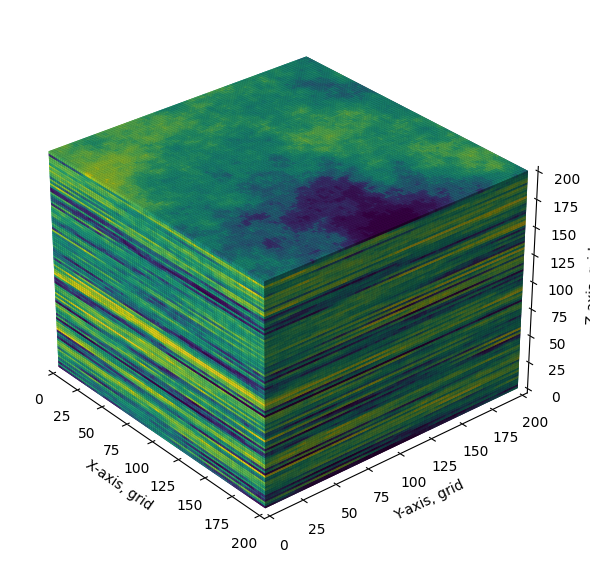

In [ ]:
visualize_3D_full(sim_perm[0],nx,ny,nz,cmap_=cm.viridis)

## 3D Fence Plot for porosity distribution

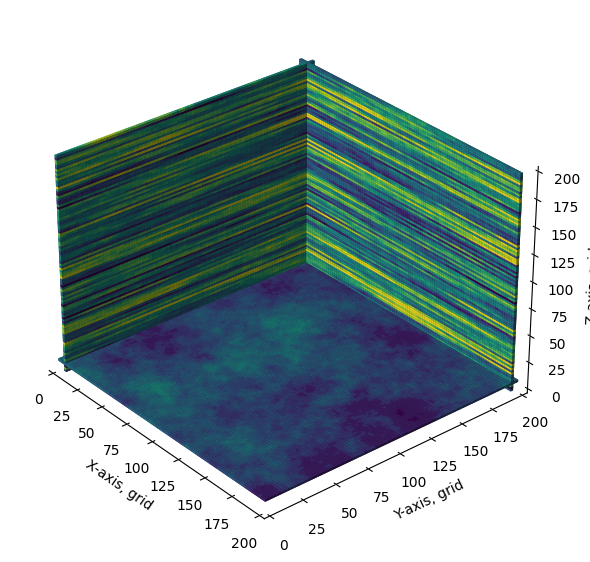

In [ ]:
visualize_3D_fence_diagram(sim[0],nx,ny,nz,cmap_=cm.viridis)

## 3D Fence Plot for Permeability distribution

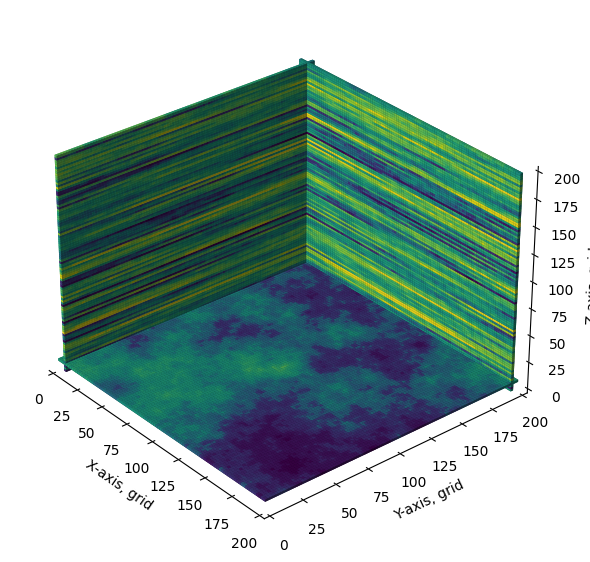

In [ ]:
visualize_3D_fence_diagram(sim_perm[0],nx,ny,nz,cmap_=cm.viridis)